# Deep Learning 
So we did a pretty good job on regression, but lets work on a neural network and make it deep! Well, shallow, but deep. Code primarily came from:
https://colab.research.google.com/drive/1J8ZTI2UIJCwml2nrLVu8Gg0GXEz-7ZK0#scrollTo=H9QlV0BC_9PY

In [3]:
#i'm just importing everything I could possibly need here
from scipy.signal import savgol_filter
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from itertools import zip_longest
import matplotlib as mpl
import seaborn as sns
import pylab
import math
from operator import itemgetter
import re
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Import module for fitting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn import linear_model
import time
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import RobustScaler #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.isotonic import IsotonicRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
#import seaborn as sns

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
#import seaborn as sb
#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score

Using TensorFlow backend.


In [76]:
#lets unpickle our dataframes!
only_347H = pd.read_pickle("./only_347H.pkl")
only_740H = pd.read_pickle("./only_740H.pkl")

#Maybe we could replace composition for 347H with dummy variables instead?
only_347H.replace([0.04, 0.08], ['Low Carbon', 'High Carbon'], inplace=True)
carbon = pd.get_dummies(only_347H['Composition'], drop_first=True)
only_347H = pd.concat([only_347H, carbon], axis=1)
only_347H.drop(['Composition'], axis=1, inplace=True)
#print (only_740H.head)

# Split data into 'X' features and 'y' target label sets
X = only_740H[['Strain', 'Temperature', 'Time', 'Position']]
y = only_740H['Average']
Z = only_347H[['Strain', 'Temperature', 'Time', 'Position', 'Low Carbon']]
i = only_347H['Average']

scaler_X = StandardScaler()
input_data_X = scaler_X.fit_transform(X)
scaler_Z = StandardScaler()
input_data_Z = scaler_Z.fit_transform(Z)

input_train_X, input_test_X, output_train_y, output_test_y = train_test_split(input_data_X, y, test_size=0.2, random_state=25)
input_train_Z, input_test_Z, output_train_i, output_test_i = train_test_split(input_data_Z, i, test_size=0.2, random_state=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [3]:
k_fold=KFold(n_splits=5)

dt_740 = DecisionTreeRegressor(criterion = 'mae', max_depth = 13)
rf_740 = RandomForestRegressor(criterion = 'mse', max_depth = 15, max_features= 'auto', min_samples_leaf= 4, min_samples_split= 10, n_estimators= 387)

dt_347 = DecisionTreeRegressor(criterion = 'mse', max_depth = 13)
rf_347 = RandomForestRegressor(criterion= 'mse',  max_depth = 27.5, max_features= 'auto',min_samples_leaf= 2,min_samples_split= 5, n_estimators= 387)
kn_347 = KNeighborsRegressor(n_neighbors= 2, weights= 'distance')

# Now Lets Try A Deep Neural Network

Again, using this code:
https://colab.research.google.com/drive/1J8ZTI2UIJCwml2nrLVu8Gg0GXEz-7ZK0#scrollTo=ROXr07cAv-pW

In [100]:
NN_model_2a = Sequential()

In [101]:
#NN_model_10._layers.pop()
NN_model = NN_model_2a
#NN_model.summary()

In [102]:
#INPUT LAYER
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = input_train_X.shape[1], activation='relu'))

#HIDDEN LAYERS
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#OUTPUT lAYER
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_60 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_61 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_62 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 257       
Total params: 165,505
Trainable params: 165,505
Non-trainable params: 0
_________________________________________________________________


In [37]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

Lets start with the 740H Model

In [38]:
NN_model.fit(input_train_X, output_train_y, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 4716 samples, validate on 1180 samples
Epoch 1/500
4716/4716 [==============================] - 1s 112us/step - loss: 121.5259 - mean_absolute_error: 121.5259 - val_loss: 21.5871 - val_mean_absolute_error: 21.5871

Epoch 00001: val_loss improved from inf to 21.58715, saving model to Weights-001--21.58715.hdf5
Epoch 2/500
4716/4716 [==============================] - 0s 73us/step - loss: 15.7010 - mean_absolute_error: 15.7010 - val_loss: 11.5727 - val_mean_absolute_error: 11.5727

Epoch 00002: val_loss improved from 21.58715 to 11.57270, saving model to Weights-002--11.57270.hdf5
Epoch 3/500
4716/4716 [==============================] - 0s 67us/step - loss: 10.6422 - mean_absolute_error: 10.6422 - val_loss: 10.7812 - val_mean_absolute_error: 10.7812

Epoch 00003: val_loss improved from 11.57270 to 10.78119, saving model to Weights-003--10.78119.hdf5
Epoch 4/500
4716/4716 [==============================] - 0s 73us/step - loss: 10.3739 - mean_absolute_error: 10.3739 - val_loss: 9.0

Epoch 36/500
4716/4716 [==============================] - 0s 88us/step - loss: 8.1622 - mean_absolute_error: 8.1622 - val_loss: 7.6369 - val_mean_absolute_error: 7.6369

Epoch 00036: val_loss did not improve from 7.09337
Epoch 37/500
4716/4716 [==============================] - 0s 69us/step - loss: 8.6332 - mean_absolute_error: 8.6332 - val_loss: 9.2618 - val_mean_absolute_error: 9.2618

Epoch 00037: val_loss did not improve from 7.09337
Epoch 38/500
4716/4716 [==============================] - 0s 73us/step - loss: 8.6486 - mean_absolute_error: 8.6486 - val_loss: 8.0813 - val_mean_absolute_error: 8.0813

Epoch 00038: val_loss did not improve from 7.09337
Epoch 39/500
4716/4716 [==============================] - 0s 71us/step - loss: 7.7326 - mean_absolute_error: 7.7326 - val_loss: 10.1478 - val_mean_absolute_error: 10.1478

Epoch 00039: val_loss did not improve from 7.09337
Epoch 40/500
4716/4716 [==============================] - 0s 71us/step - loss: 7.7704 - mean_absolute_error: 7.770


Epoch 00106: val_loss did not improve from 4.37741
Epoch 107/500
4716/4716 [==============================] - 0s 62us/step - loss: 5.5353 - mean_absolute_error: 5.5353 - val_loss: 4.1291 - val_mean_absolute_error: 4.1291

Epoch 00107: val_loss improved from 4.37741 to 4.12907, saving model to Weights-107--4.12907.hdf5
Epoch 108/500
4716/4716 [==============================] - 0s 71us/step - loss: 4.7693 - mean_absolute_error: 4.7693 - val_loss: 5.0683 - val_mean_absolute_error: 5.0683

Epoch 00108: val_loss did not improve from 4.12907
Epoch 109/500
4716/4716 [==============================] - 0s 78us/step - loss: 5.4106 - mean_absolute_error: 5.4106 - val_loss: 4.4037 - val_mean_absolute_error: 4.4037

Epoch 00109: val_loss did not improve from 4.12907
Epoch 110/500
4716/4716 [==============================] - 0s 68us/step - loss: 5.2447 - mean_absolute_error: 5.2447 - val_loss: 4.4984 - val_mean_absolute_error: 4.4984

Epoch 00110: val_loss did not improve from 4.12907
Epoch 111/500


Epoch 00178: val_loss did not improve from 3.54732
Epoch 179/500
4716/4716 [==============================] - 0s 80us/step - loss: 4.4170 - mean_absolute_error: 4.4170 - val_loss: 4.8202 - val_mean_absolute_error: 4.8202

Epoch 00179: val_loss did not improve from 3.54732
Epoch 180/500
4716/4716 [==============================] - 0s 74us/step - loss: 4.5682 - mean_absolute_error: 4.5682 - val_loss: 3.5080 - val_mean_absolute_error: 3.5080

Epoch 00180: val_loss improved from 3.54732 to 3.50803, saving model to Weights-180--3.50803.hdf5
Epoch 181/500
4716/4716 [==============================] - 0s 66us/step - loss: 4.3582 - mean_absolute_error: 4.3582 - val_loss: 6.1883 - val_mean_absolute_error: 6.1883

Epoch 00181: val_loss did not improve from 3.50803
Epoch 182/500
4716/4716 [==============================] - 0s 76us/step - loss: 4.8620 - mean_absolute_error: 4.8620 - val_loss: 3.8225 - val_mean_absolute_error: 3.8225

Epoch 00182: val_loss did not improve from 3.50803
Epoch 183/500

4716/4716 [==============================] - 0s 65us/step - loss: 4.0951 - mean_absolute_error: 4.0951 - val_loss: 5.5796 - val_mean_absolute_error: 5.5796

Epoch 00215: val_loss did not improve from 3.21419
Epoch 216/500
4716/4716 [==============================] - 0s 65us/step - loss: 4.3476 - mean_absolute_error: 4.3476 - val_loss: 4.2039 - val_mean_absolute_error: 4.2039

Epoch 00216: val_loss did not improve from 3.21419
Epoch 217/500
4716/4716 [==============================] - 0s 74us/step - loss: 4.4107 - mean_absolute_error: 4.4107 - val_loss: 4.1872 - val_mean_absolute_error: 4.1872

Epoch 00217: val_loss did not improve from 3.21419
Epoch 218/500
4716/4716 [==============================] - 0s 67us/step - loss: 4.2087 - mean_absolute_error: 4.2087 - val_loss: 4.9251 - val_mean_absolute_error: 4.9251

Epoch 00218: val_loss did not improve from 3.21419
Epoch 219/500
4716/4716 [==============================] - 0s 85us/step - loss: 4.1913 - mean_absolute_error: 4.1913 - val_los


Epoch 00251: val_loss did not improve from 3.21419
Epoch 252/500
4716/4716 [==============================] - 0s 62us/step - loss: 4.3348 - mean_absolute_error: 4.3348 - val_loss: 3.8052 - val_mean_absolute_error: 3.8052

Epoch 00252: val_loss did not improve from 3.21419
Epoch 253/500
4716/4716 [==============================] - 0s 60us/step - loss: 4.2337 - mean_absolute_error: 4.2337 - val_loss: 3.8065 - val_mean_absolute_error: 3.8065

Epoch 00253: val_loss did not improve from 3.21419
Epoch 254/500
4716/4716 [==============================] - 0s 61us/step - loss: 4.0780 - mean_absolute_error: 4.0780 - val_loss: 4.1613 - val_mean_absolute_error: 4.1613

Epoch 00254: val_loss did not improve from 3.21419
Epoch 255/500
4716/4716 [==============================] - 0s 63us/step - loss: 4.4578 - mean_absolute_error: 4.4578 - val_loss: 3.3003 - val_mean_absolute_error: 3.3003

Epoch 00255: val_loss did not improve from 3.21419
Epoch 256/500
4716/4716 [==============================] - 0


Epoch 00288: val_loss did not improve from 3.21419
Epoch 289/500
4716/4716 [==============================] - 0s 61us/step - loss: 3.9881 - mean_absolute_error: 3.9881 - val_loss: 3.5475 - val_mean_absolute_error: 3.5475

Epoch 00289: val_loss did not improve from 3.21419
Epoch 290/500
4716/4716 [==============================] - 0s 60us/step - loss: 4.0718 - mean_absolute_error: 4.0718 - val_loss: 4.6860 - val_mean_absolute_error: 4.6860

Epoch 00290: val_loss did not improve from 3.21419
Epoch 291/500
4716/4716 [==============================] - 0s 61us/step - loss: 4.0016 - mean_absolute_error: 4.0016 - val_loss: 3.9255 - val_mean_absolute_error: 3.9255

Epoch 00291: val_loss did not improve from 3.21419
Epoch 292/500
4716/4716 [==============================] - 0s 61us/step - loss: 4.0405 - mean_absolute_error: 4.0405 - val_loss: 3.3672 - val_mean_absolute_error: 3.3672

Epoch 00292: val_loss did not improve from 3.21419
Epoch 293/500
4716/4716 [==============================] - 0

4716/4716 [==============================] - 0s 66us/step - loss: 4.4596 - mean_absolute_error: 4.4596 - val_loss: 3.6094 - val_mean_absolute_error: 3.6094

Epoch 00362: val_loss did not improve from 3.09513
Epoch 363/500
4716/4716 [==============================] - 0s 61us/step - loss: 3.7655 - mean_absolute_error: 3.7655 - val_loss: 3.5983 - val_mean_absolute_error: 3.5983

Epoch 00363: val_loss did not improve from 3.09513
Epoch 364/500
4716/4716 [==============================] - 0s 63us/step - loss: 4.0689 - mean_absolute_error: 4.0689 - val_loss: 3.5754 - val_mean_absolute_error: 3.5754

Epoch 00364: val_loss did not improve from 3.09513
Epoch 365/500
4716/4716 [==============================] - 0s 64us/step - loss: 3.7916 - mean_absolute_error: 3.7916 - val_loss: 3.8179 - val_mean_absolute_error: 3.8179

Epoch 00365: val_loss did not improve from 3.09513
Epoch 366/500
4716/4716 [==============================] - 0s 63us/step - loss: 3.8004 - mean_absolute_error: 3.8004 - val_los

4716/4716 [==============================] - 0s 64us/step - loss: 3.8680 - mean_absolute_error: 3.8680 - val_loss: 3.4512 - val_mean_absolute_error: 3.4512

Epoch 00399: val_loss did not improve from 3.09513
Epoch 400/500
4716/4716 [==============================] - 0s 62us/step - loss: 3.8933 - mean_absolute_error: 3.8933 - val_loss: 4.3353 - val_mean_absolute_error: 4.3353

Epoch 00400: val_loss did not improve from 3.09513
Epoch 401/500
4716/4716 [==============================] - 0s 65us/step - loss: 3.8715 - mean_absolute_error: 3.8715 - val_loss: 6.2673 - val_mean_absolute_error: 6.2673

Epoch 00401: val_loss did not improve from 3.09513
Epoch 402/500
4716/4716 [==============================] - 0s 64us/step - loss: 4.0054 - mean_absolute_error: 4.0054 - val_loss: 3.4036 - val_mean_absolute_error: 3.4036

Epoch 00402: val_loss did not improve from 3.09513
Epoch 403/500
4716/4716 [==============================] - 0s 61us/step - loss: 3.9448 - mean_absolute_error: 3.9448 - val_los


Epoch 00435: val_loss did not improve from 3.06290
Epoch 436/500
4716/4716 [==============================] - 0s 75us/step - loss: 3.9708 - mean_absolute_error: 3.9708 - val_loss: 4.0797 - val_mean_absolute_error: 4.0797

Epoch 00436: val_loss did not improve from 3.06290
Epoch 437/500
4716/4716 [==============================] - 0s 65us/step - loss: 3.8360 - mean_absolute_error: 3.8360 - val_loss: 3.8709 - val_mean_absolute_error: 3.8709

Epoch 00437: val_loss did not improve from 3.06290
Epoch 438/500
4716/4716 [==============================] - 0s 61us/step - loss: 3.8711 - mean_absolute_error: 3.8711 - val_loss: 4.4668 - val_mean_absolute_error: 4.4668

Epoch 00438: val_loss did not improve from 3.06290
Epoch 439/500
4716/4716 [==============================] - 0s 68us/step - loss: 4.2125 - mean_absolute_error: 4.2125 - val_loss: 3.7493 - val_mean_absolute_error: 3.7493

Epoch 00439: val_loss did not improve from 3.06290
Epoch 440/500
4716/4716 [==============================] - 0


Epoch 00472: val_loss did not improve from 3.06290
Epoch 473/500
4716/4716 [==============================] - 0s 62us/step - loss: 3.8514 - mean_absolute_error: 3.8514 - val_loss: 3.2935 - val_mean_absolute_error: 3.2935

Epoch 00473: val_loss did not improve from 3.06290
Epoch 474/500
4716/4716 [==============================] - 0s 60us/step - loss: 3.8184 - mean_absolute_error: 3.8184 - val_loss: 3.2727 - val_mean_absolute_error: 3.2727

Epoch 00474: val_loss did not improve from 3.06290
Epoch 475/500
4716/4716 [==============================] - 0s 63us/step - loss: 3.6687 - mean_absolute_error: 3.6687 - val_loss: 3.3093 - val_mean_absolute_error: 3.3093

Epoch 00475: val_loss did not improve from 3.06290
Epoch 476/500
4716/4716 [==============================] - 0s 62us/step - loss: 3.6667 - mean_absolute_error: 3.6667 - val_loss: 3.1616 - val_mean_absolute_error: 3.1616

Epoch 00476: val_loss did not improve from 3.06290
Epoch 477/500
4716/4716 [==============================] - 0

In [103]:
# Load wights file of the best model :
#This should be saved automatically
#In code "Epoch 00478: val_loss improved from 19208.37602 to 18738.19831, saving model to Weights-478--18738.19831.hdf5"
wights_file = '740H--Weights-482--2.98984.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
#NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

[3.1913437250105, 3.1913440227508545]
loss: 319.13% and mean_absolute_error: 319.13%
[0.97679128 0.97255229 0.97693437 0.96799779 0.97412021]
740H Model Random Forest Accuracy: 0.97 (+/- 0.01)


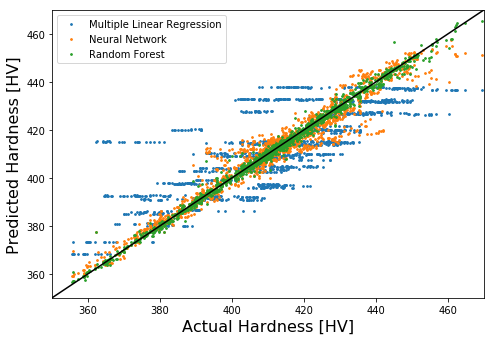

In [104]:
#Lets see how our NN model predicts
predictions = NN_model.predict(input_test_X)
scores_NN = NN_model.evaluate(input_test_X, output_test_y, verbose=0) #batch_size=batch_size
print (scores_NN)
print("%s: %.2f%% and %s: %.2f%%" % (NN_model.metrics_names[0], scores_NN[0]*100, NN_model.metrics_names[1], scores_NN[1]*100))
#print('Test score of Neural Network:', score)
#print('Test accuracy of Neural Network:', acc)

#Compare this to our random forest
rf_740 = RandomForestRegressor(criterion = 'mse', max_depth = 15, max_features= 'auto', min_samples_leaf= 4, min_samples_split= 10, n_estimators= 387)
rf_740.fit(input_train_X, output_train_y)
predicted_test_rf_740 = rf_740.predict(input_test_X)
scores_rf_740 = cross_val_score(rf_740, input_test_X, output_test_y, cv=5, n_jobs=-1)
print (scores_rf_740)
print("740H Model Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores_rf_740.mean(), scores_rf_740.std() * 2))

#just for the lols lets do MLR
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(input_train_X, output_train_y)
predicted_test_MLR = regr.predict(input_test_X)

fig = plt.figure(1)
ax = fig.add_axes([0,0,1,1])
x_1t1=np.arange(350,480,1)
    
#fig.suptitle('Actual Hardness versus Modeled Hardness for 740H')
ax.set_ylabel("Predicted Hardness [HV]", fontsize=16)
ax.set_xlabel("Actual Hardness [HV]", fontsize=16)
ax.scatter(output_test_y, predicted_test_MLR, label='Multiple Linear Regression', s=3)
ax.scatter(output_test_y, predictions, label='Neural Network', s=3)
ax.scatter( output_test_y, predicted_test_rf_740,label='Random Forest', s=3)
ax.plot(x_1t1,x_1t1,color='black')
plt.legend()
ax.set_xlim([350,470])
ax.set_ylim([350,470])
plt.savefig('1 to 1 plot NN and Random Forest.tiff', dpi=300, transparent=True, bbox_inches='tight')

I'm Still worried about overfitting for the random forest (98%!?). How do we check?

In general, this data does follow the theoretical equations pretty well. It is just physically just diffusion, but we want to make super sure that we are not overfitting.

In [82]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
 
cv = ShuffleSplit(n_splits=8, test_size=0.3, random_state=0)
rf_740.fit(input_train_X, output_train_y)
cross_val_score(rf_740, input_train_X, output_train_y, cv=cv)

array([0.98970607, 0.99035075, 0.98983787, 0.99020795, 0.99066155,
       0.99242112, 0.9895092 , 0.98974247])

I don't know I think this means it's good?

# Now 347H

In [89]:
NN_model_1e = Sequential()
NN_model = NN_model_1e
#INPUT LAYER
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = input_train_Z.shape[1], activation='relu'))

#HIDDEN LAYERS
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#OUTPUT lAYER
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_50 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_51 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_52 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 257       
Total params: 165,633
Trainable params: 165,633
Non-trainable params: 0
_________________________________________________________________


In [90]:
checkpoint_name = '347H--Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [91]:
#input_train_Z, input_test_Z, output_train_i, output_test_i
NN_model.fit(input_train_Z, output_train_i, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 2014 samples, validate on 504 samples
Epoch 1/500
2014/2014 [==============================] - 0s 221us/step - loss: 157.1102 - mean_absolute_error: 157.1103 - val_loss: 31.2344 - val_mean_absolute_error: 31.2344

Epoch 00001: val_loss improved from inf to 31.23438, saving model to 347H--Weights-001--31.23438.hdf5
Epoch 2/500
2014/2014 [==============================] - 0s 80us/step - loss: 23.5975 - mean_absolute_error: 23.5974 - val_loss: 18.6159 - val_mean_absolute_error: 18.6159

Epoch 00002: val_loss improved from 31.23438 to 18.61587, saving model to 347H--Weights-002--18.61587.hdf5
Epoch 3/500
2014/2014 [==============================] - 0s 70us/step - loss: 18.4942 - mean_absolute_error: 18.4942 - val_loss: 17.2741 - val_mean_absolute_error: 17.2741

Epoch 00003: val_loss improved from 18.61587 to 17.27411, saving model to 347H--Weights-003--17.27411.hdf5
Epoch 4/500
2014/2014 [==============================] - 0s 78us/step - loss: 16.4352 - mean_absolute_error: 16.435

2014/2014 [==============================] - 0s 71us/step - loss: 11.1784 - mean_absolute_error: 11.1784 - val_loss: 10.0182 - val_mean_absolute_error: 10.0182

Epoch 00034: val_loss improved from 10.30201 to 10.01820, saving model to 347H--Weights-034--10.01820.hdf5
Epoch 35/500
2014/2014 [==============================] - 0s 79us/step - loss: 10.9771 - mean_absolute_error: 10.9771 - val_loss: 9.9301 - val_mean_absolute_error: 9.9301

Epoch 00035: val_loss improved from 10.01820 to 9.93007, saving model to 347H--Weights-035--9.93007.hdf5
Epoch 36/500
2014/2014 [==============================] - 0s 65us/step - loss: 10.7303 - mean_absolute_error: 10.7303 - val_loss: 12.0989 - val_mean_absolute_error: 12.0989

Epoch 00036: val_loss did not improve from 9.93007
Epoch 37/500
2014/2014 [==============================] - 0s 71us/step - loss: 10.5383 - mean_absolute_error: 10.5383 - val_loss: 9.9068 - val_mean_absolute_error: 9.9068

Epoch 00037: val_loss improved from 9.93007 to 9.90677, sa

2014/2014 [==============================] - 0s 66us/step - loss: 8.0372 - mean_absolute_error: 8.0372 - val_loss: 8.4808 - val_mean_absolute_error: 8.4808

Epoch 00068: val_loss did not improve from 7.42827
Epoch 69/500
2014/2014 [==============================] - 0s 70us/step - loss: 7.5636 - mean_absolute_error: 7.5636 - val_loss: 7.0526 - val_mean_absolute_error: 7.0526

Epoch 00069: val_loss improved from 7.42827 to 7.05264, saving model to 347H--Weights-069--7.05264.hdf5
Epoch 70/500
2014/2014 [==============================] - 0s 70us/step - loss: 8.4141 - mean_absolute_error: 8.4141 - val_loss: 7.6831 - val_mean_absolute_error: 7.6831

Epoch 00070: val_loss did not improve from 7.05264
Epoch 71/500
2014/2014 [==============================] - 0s 68us/step - loss: 8.0309 - mean_absolute_error: 8.0309 - val_loss: 7.1665 - val_mean_absolute_error: 7.1665

Epoch 00071: val_loss did not improve from 7.05264
Epoch 72/500
2014/2014 [==============================] - 0s 67us/step - los

2014/2014 [==============================] - 0s 95us/step - loss: 6.9373 - mean_absolute_error: 6.9373 - val_loss: 6.0255 - val_mean_absolute_error: 6.0255

Epoch 00139: val_loss did not improve from 6.01863
Epoch 140/500
2014/2014 [==============================] - 0s 66us/step - loss: 5.8406 - mean_absolute_error: 5.8406 - val_loss: 6.1116 - val_mean_absolute_error: 6.1116

Epoch 00140: val_loss did not improve from 6.01863
Epoch 141/500
2014/2014 [==============================] - 0s 67us/step - loss: 5.8702 - mean_absolute_error: 5.8702 - val_loss: 5.9889 - val_mean_absolute_error: 5.9889

Epoch 00141: val_loss improved from 6.01863 to 5.98895, saving model to 347H--Weights-141--5.98895.hdf5
Epoch 142/500
2014/2014 [==============================] - 0s 105us/step - loss: 6.0443 - mean_absolute_error: 6.0443 - val_loss: 6.2785 - val_mean_absolute_error: 6.2785

Epoch 00142: val_loss did not improve from 5.98895
Epoch 143/500
2014/2014 [==============================] - 0s 78us/step 

2014/2014 [==============================] - 0s 70us/step - loss: 6.0423 - mean_absolute_error: 6.0423 - val_loss: 6.1706 - val_mean_absolute_error: 6.1706

Epoch 00175: val_loss did not improve from 5.65550
Epoch 176/500
2014/2014 [==============================] - 0s 75us/step - loss: 6.1131 - mean_absolute_error: 6.1131 - val_loss: 5.6170 - val_mean_absolute_error: 5.6170

Epoch 00176: val_loss improved from 5.65550 to 5.61698, saving model to 347H--Weights-176--5.61698.hdf5
Epoch 177/500
2014/2014 [==============================] - 0s 81us/step - loss: 5.8006 - mean_absolute_error: 5.8006 - val_loss: 6.5871 - val_mean_absolute_error: 6.5871

Epoch 00177: val_loss did not improve from 5.61698
Epoch 178/500
2014/2014 [==============================] - 0s 74us/step - loss: 6.0862 - mean_absolute_error: 6.0862 - val_loss: 8.2886 - val_mean_absolute_error: 8.2886

Epoch 00178: val_loss did not improve from 5.61698
Epoch 179/500
2014/2014 [==============================] - 0s 72us/step -

2014/2014 [==============================] - 0s 66us/step - loss: 5.2594 - mean_absolute_error: 5.2594 - val_loss: 6.9685 - val_mean_absolute_error: 6.9685

Epoch 00211: val_loss did not improve from 5.11548
Epoch 212/500
2014/2014 [==============================] - 0s 69us/step - loss: 5.1836 - mean_absolute_error: 5.1836 - val_loss: 5.9672 - val_mean_absolute_error: 5.9672

Epoch 00212: val_loss did not improve from 5.11548
Epoch 213/500
2014/2014 [==============================] - 0s 75us/step - loss: 6.0258 - mean_absolute_error: 6.0258 - val_loss: 5.8050 - val_mean_absolute_error: 5.8050

Epoch 00213: val_loss did not improve from 5.11548
Epoch 214/500
2014/2014 [==============================] - 0s 70us/step - loss: 5.2408 - mean_absolute_error: 5.2408 - val_loss: 5.6500 - val_mean_absolute_error: 5.6500

Epoch 00214: val_loss did not improve from 5.11548
Epoch 215/500
2014/2014 [==============================] - 0s 72us/step - loss: 5.0940 - mean_absolute_error: 5.0940 - val_los

2014/2014 [==============================] - 0s 76us/step - loss: 4.2528 - mean_absolute_error: 4.2528 - val_loss: 4.8982 - val_mean_absolute_error: 4.8982

Epoch 00283: val_loss did not improve from 4.17693
Epoch 284/500
2014/2014 [==============================] - 0s 79us/step - loss: 4.6535 - mean_absolute_error: 4.6535 - val_loss: 4.7793 - val_mean_absolute_error: 4.7793

Epoch 00284: val_loss did not improve from 4.17693
Epoch 285/500
2014/2014 [==============================] - 0s 116us/step - loss: 4.6085 - mean_absolute_error: 4.6086 - val_loss: 4.8573 - val_mean_absolute_error: 4.8573

Epoch 00285: val_loss did not improve from 4.17693
Epoch 286/500
2014/2014 [==============================] - 0s 84us/step - loss: 4.2517 - mean_absolute_error: 4.2517 - val_loss: 4.7202 - val_mean_absolute_error: 4.7202

Epoch 00286: val_loss did not improve from 4.17693
Epoch 287/500
2014/2014 [==============================] - 0s 82us/step - loss: 4.5762 - mean_absolute_error: 4.5762 - val_lo


Epoch 00319: val_loss did not improve from 4.17094
Epoch 320/500
2014/2014 [==============================] - 0s 111us/step - loss: 4.1062 - mean_absolute_error: 4.1062 - val_loss: 4.5529 - val_mean_absolute_error: 4.5529

Epoch 00320: val_loss did not improve from 4.17094
Epoch 321/500
2014/2014 [==============================] - 0s 92us/step - loss: 4.8695 - mean_absolute_error: 4.8695 - val_loss: 7.0075 - val_mean_absolute_error: 7.0075

Epoch 00321: val_loss did not improve from 4.17094
Epoch 322/500
2014/2014 [==============================] - 0s 81us/step - loss: 4.5218 - mean_absolute_error: 4.5218 - val_loss: 4.4561 - val_mean_absolute_error: 4.4561

Epoch 00322: val_loss did not improve from 4.17094
Epoch 323/500
2014/2014 [==============================] - 0s 66us/step - loss: 4.6097 - mean_absolute_error: 4.6097 - val_loss: 6.4164 - val_mean_absolute_error: 6.4164

Epoch 00323: val_loss did not improve from 4.17094
Epoch 324/500
2014/2014 [==============================] - 

2014/2014 [==============================] - 0s 111us/step - loss: 3.7736 - mean_absolute_error: 3.7736 - val_loss: 4.2433 - val_mean_absolute_error: 4.2433

Epoch 00393: val_loss did not improve from 4.11255
Epoch 394/500
2014/2014 [==============================] - 0s 86us/step - loss: 4.0967 - mean_absolute_error: 4.0967 - val_loss: 4.5511 - val_mean_absolute_error: 4.5511

Epoch 00394: val_loss did not improve from 4.11255
Epoch 395/500
2014/2014 [==============================] - 0s 69us/step - loss: 3.9443 - mean_absolute_error: 3.9443 - val_loss: 4.3658 - val_mean_absolute_error: 4.3658

Epoch 00395: val_loss did not improve from 4.11255
Epoch 396/500
2014/2014 [==============================] - 0s 77us/step - loss: 4.2080 - mean_absolute_error: 4.2080 - val_loss: 4.7048 - val_mean_absolute_error: 4.7048

Epoch 00396: val_loss did not improve from 4.11255
Epoch 397/500
2014/2014 [==============================] - 0s 76us/step - loss: 3.9828 - mean_absolute_error: 3.9828 - val_lo


Epoch 00429: val_loss did not improve from 4.06858
Epoch 430/500
2014/2014 [==============================] - 0s 74us/step - loss: 3.9893 - mean_absolute_error: 3.9893 - val_loss: 4.1493 - val_mean_absolute_error: 4.1493

Epoch 00430: val_loss did not improve from 4.06858
Epoch 431/500
2014/2014 [==============================] - 0s 72us/step - loss: 4.2085 - mean_absolute_error: 4.2085 - val_loss: 4.4089 - val_mean_absolute_error: 4.4089

Epoch 00431: val_loss did not improve from 4.06858
Epoch 432/500
2014/2014 [==============================] - 0s 76us/step - loss: 4.3118 - mean_absolute_error: 4.3118 - val_loss: 6.5836 - val_mean_absolute_error: 6.5836

Epoch 00432: val_loss did not improve from 4.06858
Epoch 433/500
2014/2014 [==============================] - 0s 95us/step - loss: 4.3311 - mean_absolute_error: 4.3311 - val_loss: 4.1504 - val_mean_absolute_error: 4.1504

Epoch 00433: val_loss did not improve from 4.06858
Epoch 434/500
2014/2014 [==============================] - 0

In [ ]:
# Load wights file of the best model :
#This should be saved automatically
#In code "Epoch 00478: val_loss improved from 19208.37602 to 18738.19831, saving model to Weights-478--18738.19831.hdf5"
wights_file_2 = '347H--Weights-482--3.85084.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file_2) # load it
#NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [106]:
#Lets see how our NN model predicts
predictions_347 = NN_model.predict(input_test_Z)
scores_NN = NN_model.evaluate(input_test_Z, output_test_i, verbose=0) #batch_size=batch_size
print (scores_NN)
print("%s: %.2f%% and %s: %.2f%%" % (NN_model.metrics_names[0], scores_NN[0], NN_model.metrics_names[1], scores_NN[1]))
#print('Test score of Neural Network:', score)
#print('Test accuracy of Neural Network:', acc)

#Compare this to our random forest
rf_347 = RandomForestRegressor(criterion= 'mse',  max_depth = 27.5, max_features= 'auto',min_samples_leaf= 2,min_samples_split= 5, n_estimators= 387)
rf_347.fit(input_train_Z, output_train_i)
predicted_test_rf_347 = rf_347.predict(input_test_Z)
scores_rf_347 = cross_val_score(rf_347, input_test_Z, output_test_i, cv=5, n_jobs=-1)
print (scores_rf_740)
print("740H Model Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores_rf_740.mean(), scores_rf_740.std() * 2))

#just for the lols lets do MLR
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(input_train_Z, output_train_i)
predicted_test_MLR_347 = regr.predict(input_test_Z)

ValueError: Error when checking input: expected dense_59_input to have shape (4,) but got array with shape (5,)

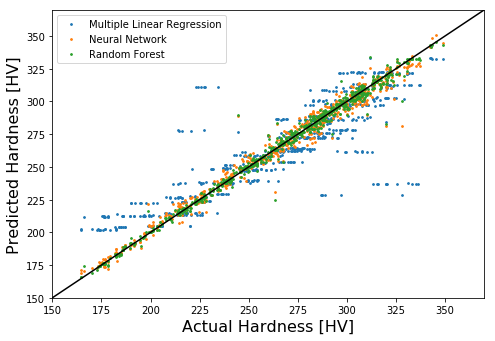

In [107]:
fig = plt.figure(1)
ax = fig.add_axes([0,0,1,1])
x_1t1=np.arange(100,500,1)
    
#fig.suptitle('Actual Hardness versus Modeled Hardness for 740H')
ax.set_ylabel("Predicted Hardness [HV]", fontsize=16)
ax.set_xlabel("Actual Hardness [HV]", fontsize=16)
ax.scatter( output_test_i, predicted_test_MLR_347,label='Multiple Linear Regression', s=3)
ax.scatter( output_test_i, predictions_347,label='Neural Network', s=3)
ax.scatter( output_test_i, predicted_test_rf_347,label='Random Forest', s=3)
ax.plot(x_1t1,x_1t1,color='black')
plt.legend()
ax.set_xlim([150,370])
ax.set_ylim([150,370])
plt.savefig('347H 1 to 1 plot NN and Random Forest.tiff', dpi=300, transparent=True, bbox_inches='tight')

# I think that it's fine
Let's try making this work!

In [2]:
#time_dimension = np.arange(1,2000)
#strain_value = 

#X = only_740H[['Strain', 'Temperature', 'Time', 'Position']]
#Z = only_347H[['Strain', 'Temperature', 'Time', 'Position', 'Low Carbon']]

#scaler_X = StandardScaler()
#input_data_X = scaler_X.fit_transform(X)
#scaler_Z = StandardScaler()
#input_data_Z = scaler_Z.fit_transform(Z)

print (X)

NameError: name 'X' is not defined